<a href="https://colab.research.google.com/github/DorMm1/Ono-Image-Processing/blob/master/Lesson09_dogs_vs_cats_without_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

StudentName = 'Dor Menahem' StudentID = '318687746' StudentMobile = '052-8028427'

##### Copyright 2019 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Dogs vs Cats Image Classification Without Image Augmentation - NOT

# Dogs and Cats vs Dogs and Cats with Noise Classification - YES
:)

# Importing packages

Let's start by importing required packages:

*   os — to read files and directory structure
*   numpy — for some matrix math outside of TensorFlow
*   matplotlib.pyplot — to plot the graph and display images in our training and validation data


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging

In [4]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Data Loading

To build our image classifier, we begin by downloading the dataset. The dataset we are using is a filtered version of <a href="https://www.kaggle.com/c/dogs-vs-cats/data" target="_blank">Dogs vs. Cats</a> dataset from Kaggle (ultimately, this dataset is provided by Microsoft Research).

In previous Colabs, we've used <a href="https://www.tensorflow.org/datasets" target="_blank">TensorFlow Datasets</a>, which is a very easy and convenient way to use datasets. In this Colab however, we will make use of the class `tf.keras.preprocessing.image.ImageDataGenerator` which will read data from disk. We therefore need to directly download *Dogs vs. Cats* from a URL and unzip it to the Colab filesystem.

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


The dataset we have downloaded has the following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

We can list the directories with the following terminal command:

In [6]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


##Dor to chat:
Hey im working on a google colab notebook called: # Dogs vs Cats Image Classification Without Image Augmentation
I want to change the classification question, I wish to distinguish between cats and dogs photos without "noise" versus photos with "noise". so I have bunch on images of cats and dogs and I want to add noise to half of them randomly and the classification will tell me if its with or without noise
---
Okay so I have a zip im downloading in my code with this folder structure:
cats_and_dogs_filtered

train:

    |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]

validation:

    |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]

I need you take write me a code that takes this zip, unzips it and restructure the photos to train and validation in the right way to answer my new classification needs

In [7]:
import zipfile
import os
import random
from shutil import copyfile
import cv2


# Path to the downloaded zip file
zip_path = zip_dir

# Directory where you want to extract the images
extracted_path = "/root/.keras/datasets/cats_and_dogs_filtered"

# Create directories for the new structure
train_path = os.path.join(zip_dir_base, "train")
os.makedirs(train_path, exist_ok=True)

validation_path = os.path.join(extracted_path, "validation")
os.makedirs(validation_path, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract the contents to the specified directory
    zip_ref.extractall(extracted_path)

# Function to apply noise to an image
def apply_noise(image_path, output_path):
    # Your noise generation logic here
    # Example: Add Gaussian noise
    image = cv2.imread(image_path)
    noise = np.random.normal(loc=0, scale=25, size=image.shape)
    noisy_image = image + noise
    cv2.imwrite(output_path, noisy_image)

# Function to organize images based on noise
def organize_images(source_dir, destination_dir, noise_probability):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            source_file_path = os.path.join(root, file)
            dest_category = "with_noise" if random.random() < noise_probability else "without_noise"
            dest_folder = os.path.join(destination_dir, dest_category)
            os.makedirs(dest_folder, exist_ok=True)
            dest_file_path = os.path.join(dest_folder, file)

            # Apply noise and copy the file to the destination
            apply_noise(source_file_path, dest_file_path)

# Organize training set
organize_images(os.path.join(extracted_path, "train"), train_path, noise_probability=0.5)

# Organize validation set
organize_images(os.path.join(extracted_path, "validation"), validation_path, noise_probability=0.5)


#Dor:
I want to add printing of the new directory tree

In [8]:
print("\nNew Directory Tree:")
for root, dirs, files in os.walk(extracted_path):
    level = root.replace(extracted_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))


New Directory Tree:
cats_and_dogs_filtered/
    cats_and_dogs_filtered/
        validation/
            dogs/
            cats/
        train/
            dogs/
            cats/
    validation/
        dogs/
        with_noise/
        without_noise/
        cats/
    train/
        dogs/
        cats/


#Dor:
I want the directory tree to be
```
cats_and_dogs_filtered/
  /train
    /with noise
    /without noise
  /validation
    /with noise
    /without noise

```

Fix the whole code you wrote me

In [9]:
import zipfile
import os
import random
import cv2
import numpy as np
from shutil import copyfile

# Create directories for the new structure
train_path = os.path.join(extracted_path, "train")
os.makedirs(train_path, exist_ok=True)

validation_path = os.path.join(extracted_path, "validation")
os.makedirs(validation_path, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Extracting files...")
    # Extract the contents to the specified directory
    zip_ref.extractall(extracted_path)
    print("Extraction complete.")

# Function to apply noise to an image
def apply_noise(image_path, output_path):
    # Your noise generation logic here
    # Example: Add Gaussian noise
    image = cv2.imread(image_path)
    noise = np.random.normal(loc=0, scale=25, size=image.shape)
    noisy_image = image + noise
    cv2.imwrite(output_path, noisy_image)

# Function to organize images based on noise
def organize_images(source_dir, destination_dir, noise_probability):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            source_file_path = os.path.join(root, file)
            dest_category = "with_noise" if random.random() < noise_probability else "without_noise"
            dest_folder = os.path.join(destination_dir, dest_category)
            os.makedirs(dest_folder, exist_ok=True)
            dest_file_path = os.path.join(dest_folder, file)

            # Apply noise and copy the file to the destination
            apply_noise(source_file_path, dest_file_path)

# Organize training set
print("Organizing training set...")
organize_images(os.path.join(extracted_path, "train"), train_path, noise_probability=0.5)
print("Training set organization complete.")

# Organize validation set
print("Organizing validation set...")
organize_images(os.path.join(extracted_path, "validation"), validation_path, noise_probability=0.5)
print("Validation set organization complete.")

# Print the new directory tree
print("\nNew Directory Tree:")
for root, dirs, files in os.walk(extracted_path):
    level = root.replace(extracted_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))

# Print a summary
print("\nJob completed successfully.")


Extracting files...
Extraction complete.
Organizing training set...
Training set organization complete.
Organizing validation set...
Validation set organization complete.

New Directory Tree:
cats_and_dogs_filtered/
    cats_and_dogs_filtered/
        validation/
            dogs/
            cats/
        train/
            dogs/
            cats/
    validation/
        dogs/
        with_noise/
        without_noise/
        cats/
    train/
        dogs/
        with_noise/
        without_noise/
        cats/

Job completed successfully.


#Dor:
This still doesnt work as I want. I will explain again. in the /train and /validation folder I want you to extract all on the photos togheter from /dogs and /cats to /train and /validation.
Afterwards I want you to randomly add noise to the pictures.
The pictures with the noise go to a new folder called with-noise and the left over pictures go to a new folder called without-noise.

```
cats_and_dogs_filtered/
  /train
    /with-noise
    /without-noise
  /validation
    /with-noise
    /without-noise
```



In [10]:
# import zipfile
# import os
# import random
# import cv2
# import numpy as np
# from shutil import copyfile

# # Path to the downloaded zip file
# zip_path = zip_dir

# # Directory where you want to extract the images
# extracted_path = "/root/.keras/datasets/cats_and_dogs_filtered"
# # Create directories for the new structure
# train_path = os.path.join(extracted_path, "train")
# os.makedirs(train_path, exist_ok=True)

# validation_path = os.path.join(extracted_path, "validation")
# os.makedirs(validation_path, exist_ok=True)

# # Open the zip file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     print("Extracting files...")
#     # Extract the contents to the specified directory
#     zip_ref.extractall(extracted_path)
#     print("Extraction complete.")

# # Function to apply noise to an image
# def apply_noise(image_path, output_path):
#     # Your noise generation logic here
#     # Example: Add Gaussian noise
#     image = cv2.imread(image_path)
#     noise = np.random.normal(loc=0, scale=25, size=image.shape)
#     noisy_image = image + noise
#     cv2.imwrite(output_path, noisy_image)

# # Function to organize images based on noise
# def organize_images(source_dir, destination_dir):
#     for root, dirs, files in os.walk(source_dir):
#         for file in files:
#             source_file_path = os.path.join(root, file)
#             dest_folder = destination_dir
#             os.makedirs(dest_folder, exist_ok=True)
#             dest_file_path = os.path.join(dest_folder, file)

#             # Apply noise and copy the file to the destination
#             apply_noise(source_file_path, dest_file_path)

# # Organize training set
# print("Organizing training set with noise...")
# organize_images(os.path.join(extracted_path, "train", "dogs"), os.path.join(train_path, "with-noise"))
# organize_images(os.path.join(extracted_path, "train", "cats"), os.path.join(train_path, "with-noise"))
# print("Training set with noise organization complete.")

# # Organize validation set
# print("Organizing validation set with noise...")
# organize_images(os.path.join(extracted_path, "validation", "dogs"), os.path.join(validation_path, "with-noise"))
# organize_images(os.path.join(extracted_path, "validation", "cats"), os.path.join(validation_path, "with-noise"))
# print("Validation set with noise organization complete.")

# # Create directories for without-noise
# train_without_noise_path = os.path.join(train_path, "without-noise")
# os.makedirs(train_without_noise_path, exist_ok=True)

# validation_without_noise_path = os.path.join(validation_path, "without-noise")
# os.makedirs(validation_without_noise_path, exist_ok=True)

# # Move the remaining images to without-noise folders
# for root, dirs, files in os.walk(os.path.join(extracted_path, "train")):
#     for file in files:
#         source_file_path = os.path.join(root, file)
#         dest_file_path = os.path.join(train_without_noise_path, file)
#         if not os.path.exists(dest_file_path):
#             copyfile(source_file_path, dest_file_path)

# for root, dirs, files in os.walk(os.path.join(extracted_path, "validation")):
#     for file in files:
#         source_file_path = os.path.join(root, file)
#         dest_file_path = os.path.join(validation_without_noise_path, file)
#         if not os.path.exists(dest_file_path):
#             copyfile(source_file_path, dest_file_path)

# # Print the new directory tree
# print("\nNew Directory Tree:")
# for root, dirs, files in os.walk(extracted_path):
#     level = root.replace(extracted_path, '').count(os.sep)
#     indent = ' ' * 4 * (level)
#     print('{}{}/'.format(indent, os.path.basename(root)))

# # Print a summary
# print("\nJob completed successfully.")


#Dor:
Now in a new code block and parameters to each directory in the next manner:
```
train_without-noise_dir =
train_with-noise =
validation_without-noise_dir =
validation_with-noise_dir =
```




In [11]:
# import zipfile
# import os
# import random
# import cv2
# import numpy as np
# from shutil import copyfile


# # Create directories for the new structure
# train_path = os.path.join(extracted_path, "train")
# os.makedirs(train_path, exist_ok=True)

# validation_path = os.path.join(extracted_path, "validation")
# os.makedirs(validation_path, exist_ok=True)

# # Open the zip file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     print("Extracting files...")
#     # Extract the contents to the specified directory
#     zip_ref.extractall(extracted_path)
#     print("Extraction complete.")

# # Function to apply noise to an image
# def apply_noise(image_path, output_path):
#     # Your noise generation logic here
#     # Example: Add Gaussian noise
#     image = cv2.imread(image_path)
#     noise = np.random.normal(loc=0, scale=25, size=image.shape)
#     noisy_image = image + noise
#     cv2.imwrite(output_path, noisy_image)

# # Function to organize images based on noise
# def organize_images(source_dir, destination_dir):
#     for root, dirs, files in os.walk(source_dir):
#         for file in files:
#             source_file_path = os.path.join(root, file)
#             dest_folder = destination_dir
#             os.makedirs(dest_folder, exist_ok=True)
#             dest_file_path = os.path.join(dest_folder, file)

#             # Apply noise and copy the file to the destination
#             apply_noise(source_file_path, dest_file_path)

# # Organize training set
# train_without_noise_dir = os.path.join(train_path, "without-noise")
# train_with_noise_dir = os.path.join(train_path, "with-noise")

# print(f"\nOrganizing training set without noise to: {train_without_noise_dir}")
# organize_images(os.path.join(extracted_path, "train", "dogs"), train_without_noise_dir)
# organize_images(os.path.join(extracted_path, "train", "cats"), train_without_noise_dir)
# print("Training set without noise organization complete.")

# print(f"\nOrganizing training set with noise to: {train_with_noise_dir}")
# organize_images(os.path.join(extracted_path, "train", "dogs"), train_with_noise_dir)
# organize_images(os.path.join(extracted_path, "train", "cats"), train_with_noise_dir)
# print("Training set with noise organization complete.")

# # Organize validation set
# validation_without_noise_dir = os.path.join(validation_path, "without-noise")
# validation_with_noise_dir = os.path.join(validation_path, "with-noise")

# print(f"\nOrganizing validation set without noise to: {validation_without_noise_dir}")
# organize_images(os.path.join(extracted_path, "validation", "dogs"), validation_without_noise_dir)
# organize_images(os.path.join(extracted_path, "validation", "cats"), validation_without_noise_dir)
# print("Validation set without noise organization complete.")

# print(f"\nOrganizing validation set with noise to: {validation_with_noise_dir}")
# organize_images(os.path.join(extracted_path, "validation", "dogs"), validation_with_noise_dir)
# organize_images(os.path.join(extracted_path, "validation", "cats"), validation_with_noise_dir)
# print("Validation set with noise organization complete.")

# # Print a summary
# print("\nJob completed successfully.")


## Note:
Chat couldn't generate the wanted solution so I commented it out, eventually after debugging the code I fixed it manually as you'll see below

In [12]:
for root, dirs, files in os.walk(extracted_path):
    level = root.replace(extracted_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))

cats_and_dogs_filtered/
    cats_and_dogs_filtered/
        validation/
            dogs/
            cats/
        train/
            dogs/
            cats/
    validation/
        dogs/
        with_noise/
        without_noise/
        cats/
    train/
        dogs/
        with_noise/
        without_noise/
        cats/


(wrote the code manually without chatgpt)

In [13]:
import os
import shutil

try:
  shutil.rmtree("/root/.keras/datasets/cats_and_dogs_filtered/cats_and_dogs_filtered")
except Exception as e:
  print(f"Error: {e}")

for root, dirs, files in os.walk(extracted_path):
    level = root.replace(extracted_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))

cats_and_dogs_filtered/
    validation/
        dogs/
        with_noise/
        without_noise/
        cats/
    train/
        dogs/
        with_noise/
        without_noise/
        cats/


In [14]:
import os
import shutil

try:
  shutil.rmtree("/root/.keras/datasets/cats_and_dogs_filtered/train/cats")
  shutil.rmtree("/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs")
  shutil.rmtree("/root/.keras/datasets/cats_and_dogs_filtered/validation/cats")
  shutil.rmtree("/root/.keras/datasets/cats_and_dogs_filtered/train/dogs")
except Exception as e:
  print(f"Error: {e}")

for root, dirs, files in os.walk(extracted_path):
    level = root.replace(extracted_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))

cats_and_dogs_filtered/
    validation/
        with_noise/
        without_noise/
    train/
        with_noise/
        without_noise/


#Copy pasted the original code and text into chatgpt to get this output:

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_path = "/root/.keras/datasets/cats_and_dogs_filtered/train"
validation_path = "/root/.keras/datasets/cats_and_dogs_filtered/validation"

# Constants
BATCH_SIZE = 100
IMG_SHAPE = 150

# Set up ImageDataGenerators
train_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for validation data

# Set up generators using flow_from_directory
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

validation_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                                     directory=validation_path,
                                                                     shuffle=False,
                                                                     target_size=(IMG_SHAPE, IMG_SHAPE),
                                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1769 images belonging to 2 classes.


### Visualizing Training images (Original code was copy pasted to chatGPT)

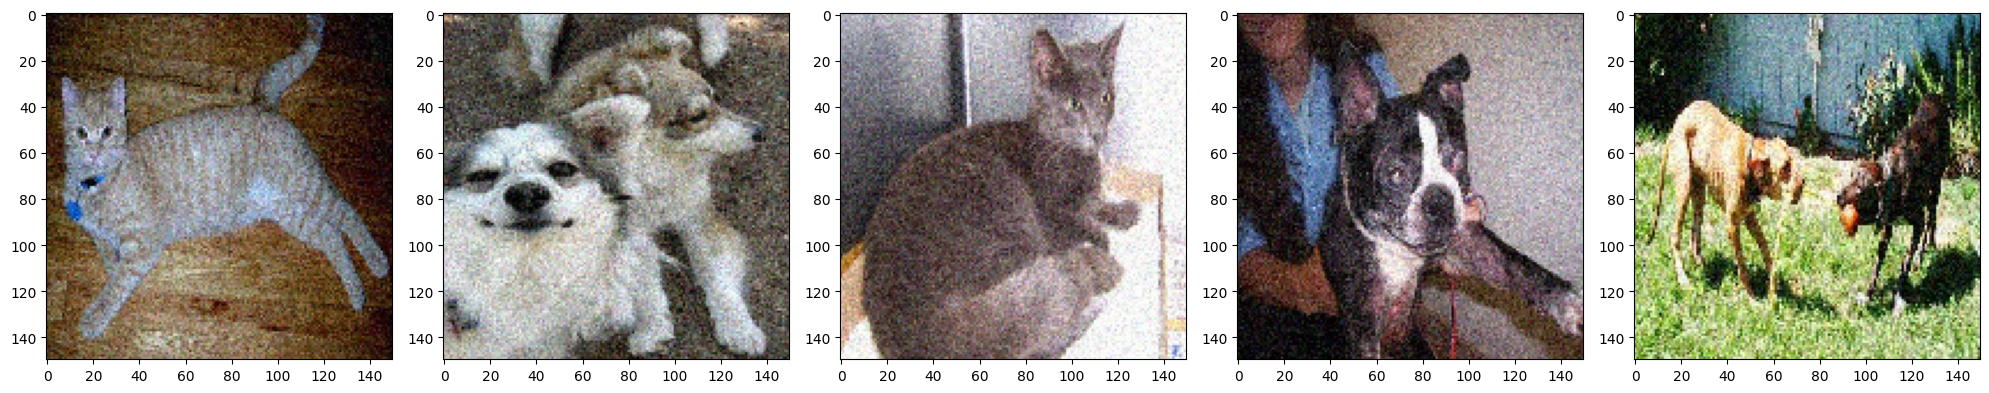

In [16]:
import matplotlib.pyplot as plt

# Visualize training images
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Plot the first 5 images from the training set
plotImages(sample_training_images[:5])


## Define the model

The model consists of four convolution blocks with a max pool layer in each of them. Then we have a fully connected layer with 512 units, with a `relu` activation function. The model will output class probabilities for two classes — dogs and cats — using `softmax`.

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

### Compile the model

As usual, we will use the `adam` optimizer. Since we output a softmax categorization, we'll use `sparse_categorical_crossentropy` as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Summary

Let's look at all the layers of our network using **summary** method.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

### Train the model

It's time we train our network.

Since our batches are coming from a generator (`ImageDataGenerator`), we'll use `fit_generator` instead of `fit`.

In [22]:
EPOCHS = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(2000 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=validation_data_gen,
    validation_steps=int(np.ceil(1000 / float(BATCH_SIZE)))
)

<ipython-input-22-9de3645cba2c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
20/20 [==============================] - 10s 495ms/step - loss: 4.4684e-04 - accuracy: 1.0000 - val_loss: 5.5491 - val_accuracy: 0.5150
Epoch 2/20
20/20 [==============================] - 9s 449ms/step - loss: 3.4963e-04 - accuracy: 1.0000 - val_loss: 5.6207 - val_accuracy: 0.5150
Epoch 3/20
20/20 [==============================] - 12s 615ms/step - loss: 3.8196e-04 - accuracy: 1.0000 - val_loss: 5.6732 - val_accuracy: 0.5130
Epoch 4/20
20/20 [==============================] - 10s 490ms/step - loss: 6.3679e-04 - accuracy: 0.9995 - val_loss: 5.6737 - val_accuracy: 0.5130
Epoch 5/20
20/20 [==============================] - 12s 588ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 5.5850 - val_accuracy: 0.5190
Epoch 6/20
20/20 [==============================] - 10s 492ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 5.7607 - val_accuracy: 0.5050
Epoch 7/20
20/20 [==============================] - 9s 457ms/step - loss: 6.6492e-04 - accuracy: 0.9995 - val_loss: 5.7484 - va

### Visualizing results of the training

We'll now visualize the results we get after training our network.

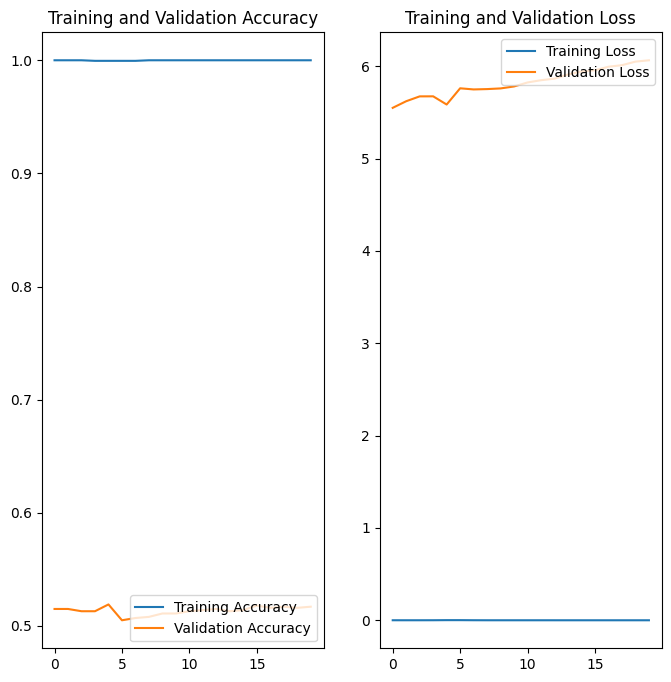

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()